In [1]:
import matplotlib.pyplot as plt
import seaborn as sb

from utils import *

In [2]:
rc = {
    'axes.axisbelow': True,
    'axes.linewidth': 1.0,
    'figure.dpi': 150,
    'font.size': 12.0,
    'legend.fontsize': 'xx-small',
    'lines.linewidth': 1.0,
    'savefig.transparent': True,
    'xtick.labelsize': 'x-small',
    'xtick.major.width': 1.0,
    'ytick.labelsize': 'x-small',
    'ytick.major.width': 1.0,
    'font.family': ['serif'],
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
}

plt.rcParams.update(rc)

## Data

In [3]:
keys = jax.random.split(jax.random.key(0))

p_x = smooth_manifold(keys[0], shape=(4096,), m=1, n=5)
p_x = (p_x - p_x.min(axis=0)) / (p_x.max(axis=0) - p_x.min(axis=0))
p_x = 4.0 * p_x - 2.0

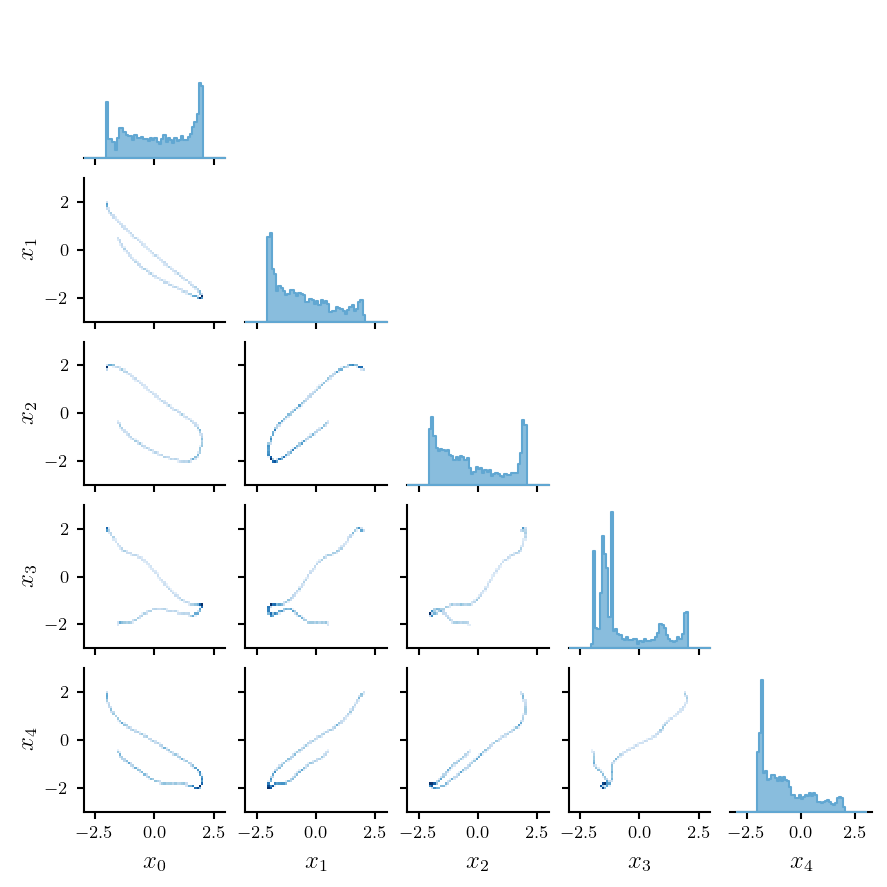

In [4]:
fig = show_corner(p_x, height=1.2)
fig.tight_layout(pad=0.5)
fig.savefig('manifold_px.pdf', dpi=300)

## Prior

In [5]:
run = 'vocal-resonance-43_fgi53beg'
runpath = PATH / f'runs/{run}'
lap = 15

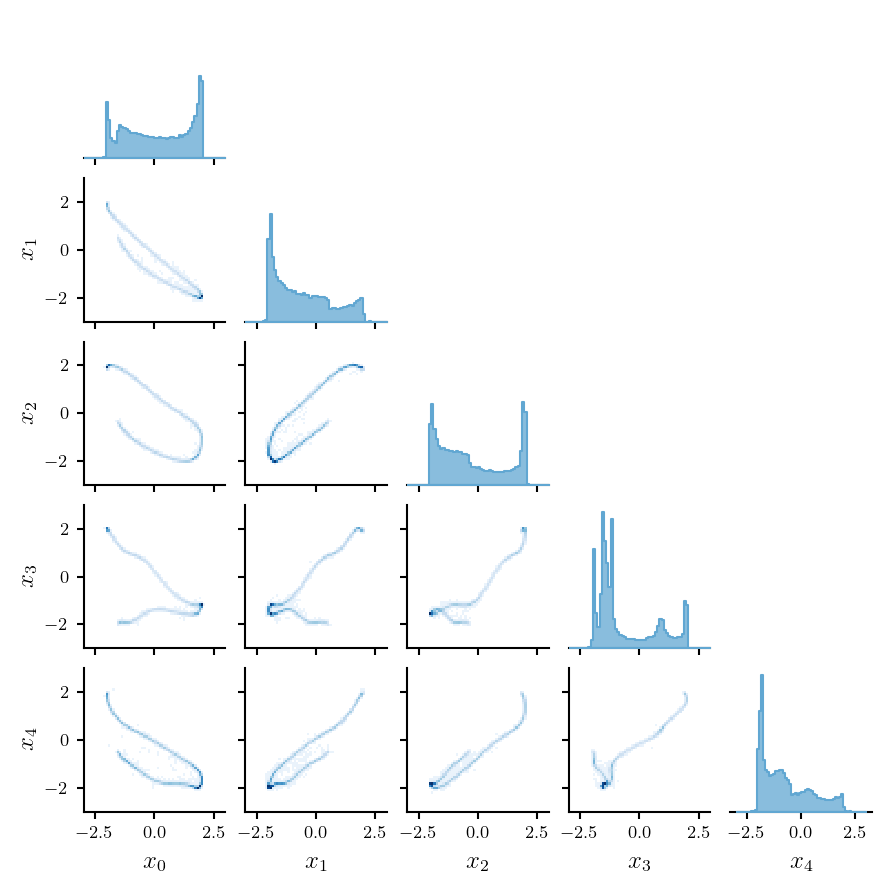

In [6]:
q_x = np.load(runpath / f'checkpoint_{lap}.npy')

fig = show_corner(q_x, height=1.2)
fig.tight_layout(pad=0.5)
fig.savefig(f'manifold_qx_{lap}.pdf', dpi=300)

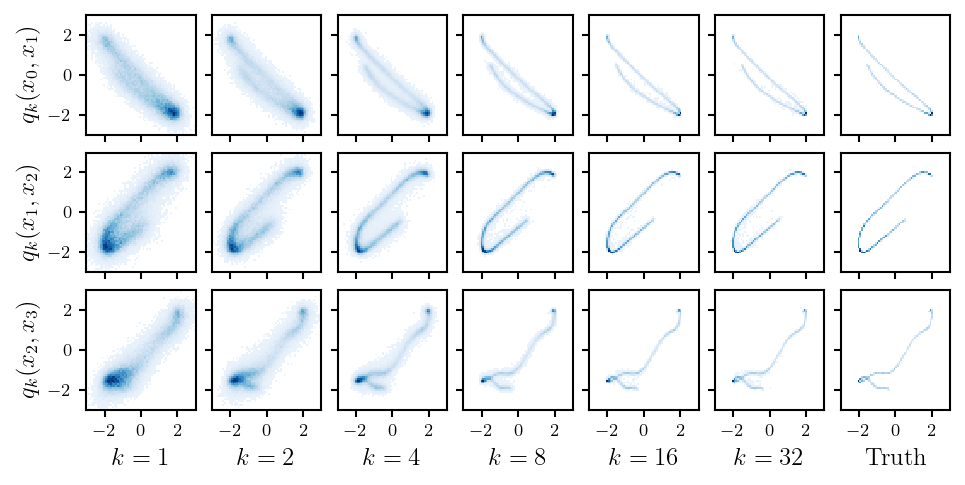

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=7, sharex=True, sharey=True, figsize=(6.4, 3.2))

for i in range(3):
    for ax, lap in zip(axs[i], (0, 1, 3, 7, 15, 31)):
        q_x = np.load(runpath / f'checkpoint_{lap}.npy')

        ax = show_pair(q_x[:, i:i+2], rasterized=True, ax=ax)
        ax.set_xticks((-2, 0, 2))
        ax.set_yticks((-2, 0, 2))

        ax.set_xlabel(f'$k = {lap + 1}$')
        ax.set_ylabel(f'$q_k(x_{i}, x_{i+1})$')
        ax.label_outer()

    ax = axs[i][-1]
    ax = show_pair(p_x[:, i:i+2], rasterized=True, ax=ax)

    ax.set_xlabel(f'Truth')
    ax.label_outer()

fig.tight_layout(pad=0.5)
fig.subplots_adjust(wspace=0.15, hspace=0.15)
fig.savefig('manifold_evolution.pdf', dpi=300)